In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

df = pd.read_csv(f"{PROJECT_ROOT}/data/clean/spotify_clean.csv")
df.head()

,artists,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,gen hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,ben woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,ingrid michaelson;zayn,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,kina grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,chord overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

audio_clust = df[
    ["danceability", 
     "energy",
     "loudness", 
     "speechiness",
     "acousticness",
     "instrumentalness",
     "liveness",
     "valence",
     "tempo"]
]

audio_clust.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


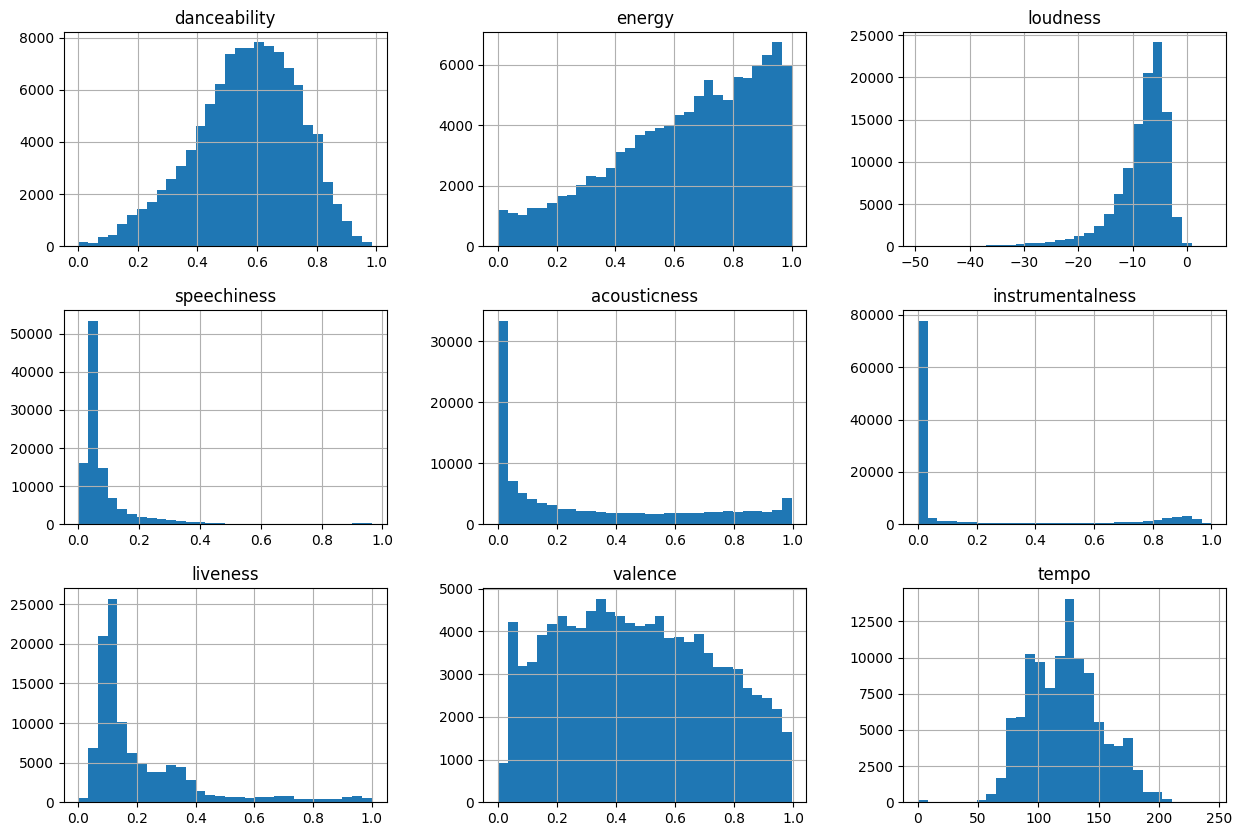

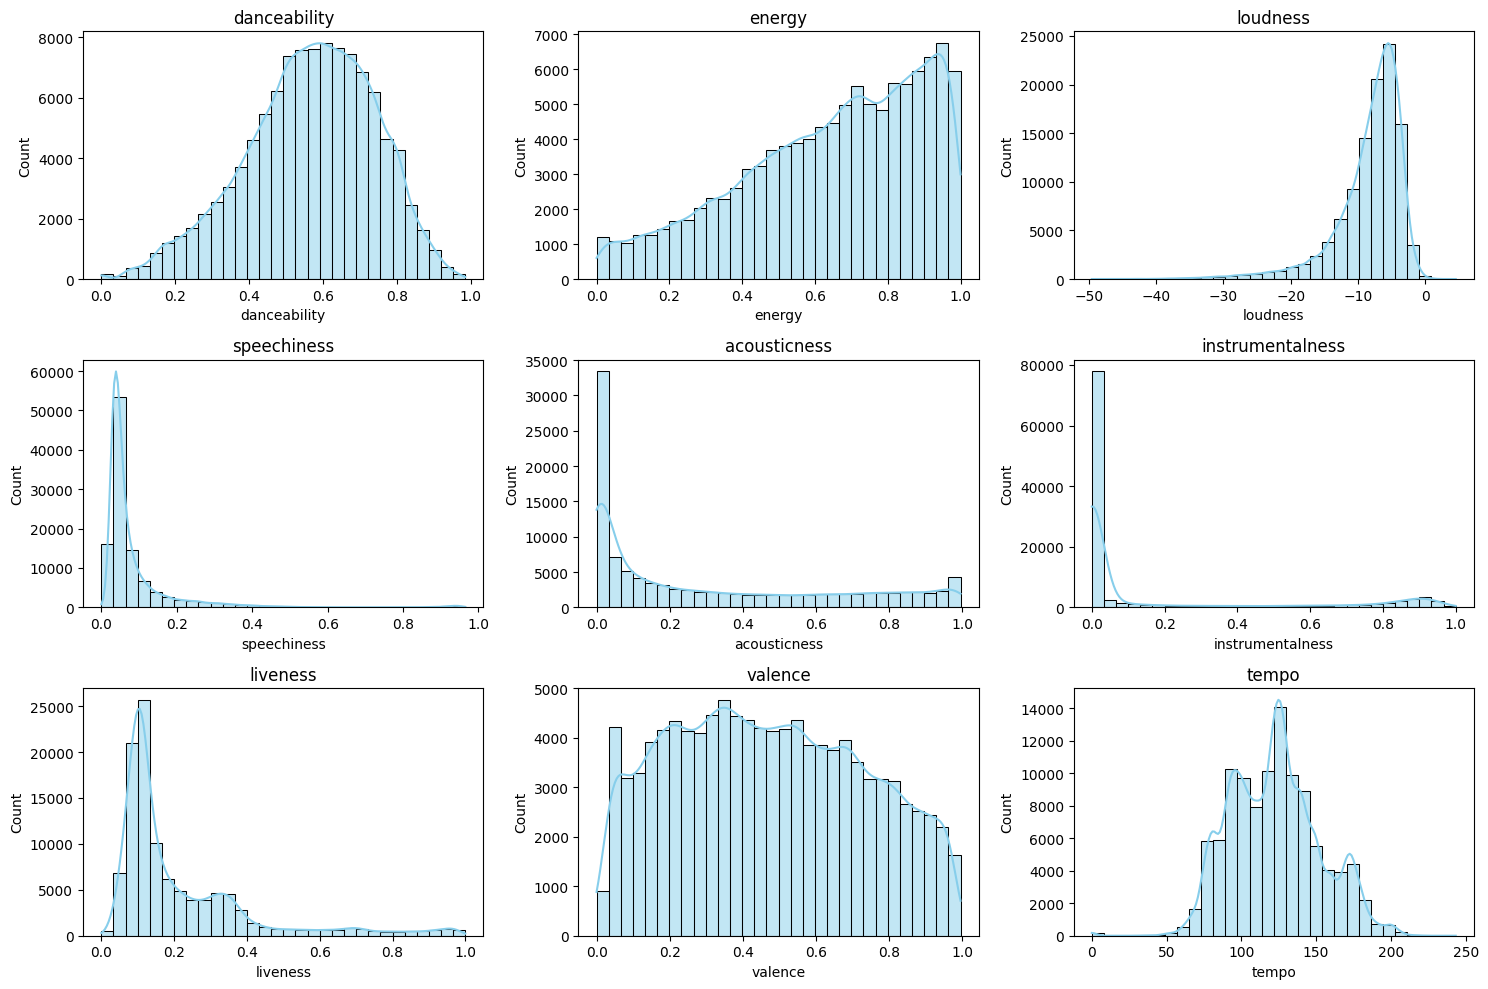

In [3]:
# Univariate plots

#----------------Histograms------------------------#

audio_clust.hist(bins = 30,figsize= (15,10))
plt.show()

plt.figure(figsize=(15,10))
for i, col in enumerate(audio_clust.columns):
    plt.subplot(3,3,i+1)          # 3x3 grid for 9 features
    sns.histplot(audio_clust[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()






H1: Users can be grouped based on preferred danceability and energy

H2: Acousticness and instrumentalness can define niche playlists for specific tastes.

H3: Speechiness separates vocal vs rap-heavy track preferences.

H4: Tempo and valence can define mood-based recommendations.

H5: Liveness and loudness help differentiate studio vs live preferences.

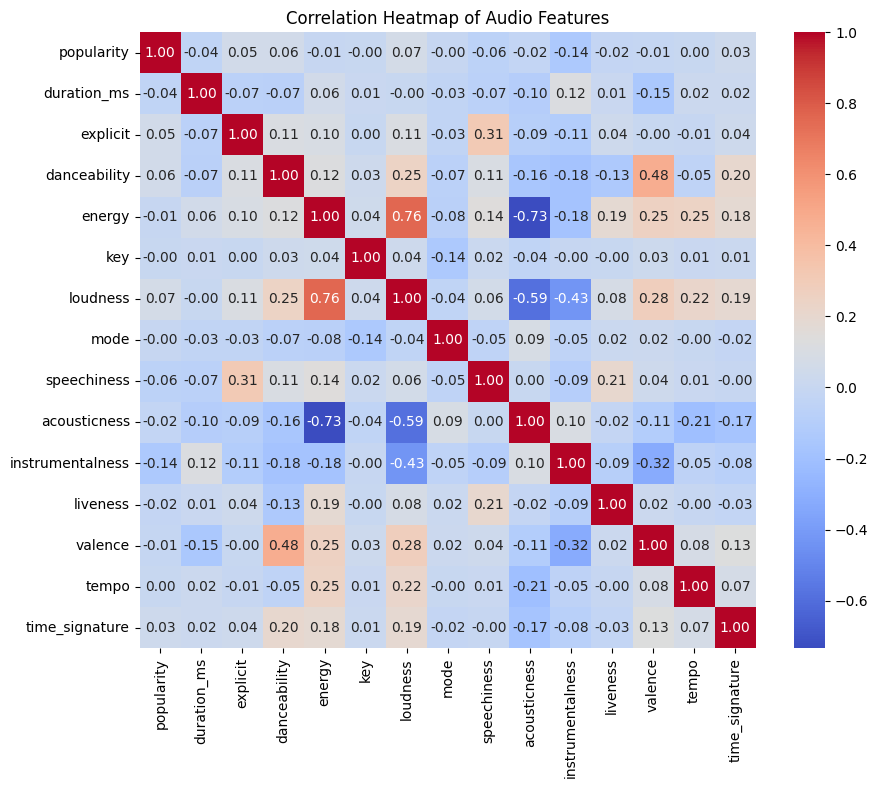

In [5]:
# correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Audio Features')
plt.show()
